# Ex1.

1. Generate some data

In [1]:
import numpy as np
n_cls = 20
# Number of samples in each class.
np.random.seed(1) # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2) # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3) # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4) # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
X = np.vstack((
np.hstack((x11, x12)),
np.hstack((x21, x22))
))
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

2. Train SVM classifier

In [2]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

3. Plot the result on the screen

Text(0, 0.5, 'x2')

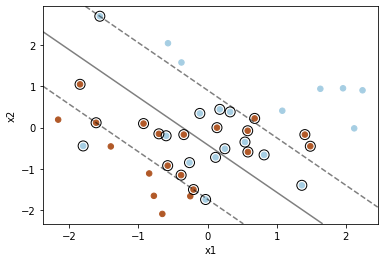

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')

4. Classify new examples

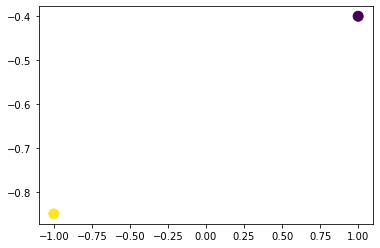

In [4]:
X_new = np.array([
[1, -0.4],
[-1, -0.85],
])
y_new = clf.predict(X_new)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Ex2

In [5]:
with open('get_vocabulary_dict.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
import csv

from typing import Dict


def get_vocabulary_dict() -> Dict[int, str]:
    """Read the fixed vocabulary list from the datafile and return.

    :return: a dictionary of words mapped to their indexes
    """

    # - The file is saved in tab-separated values (TSV) format.
    # - Each line contains a word's ID and the word itself.
    # The output dictionary should map word's ID on the word itself, e.g.:
    #   {1: 'aa', 2: 'ab', ...}
    vocab = dict()
    with open('data/vocab.txt') as file:
        reader = csv.reader(file, delimiter='\t')
        for data in reader:
            vocab[int(data[0])] = data[1]

    return vocab




In [6]:
with open('process_email.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
import re
from typing import List

from nltk import PorterStemmer

from get_vocabulary_dict import get_vocabulary_dict

def get_key(value: str, dictionary: dict) -> int:
    for key, val in dictionary.items():
        if value == val:
            return key
    return 0

def process_email(email_contents: str) -> List[int]:
    """Pre-process the body of an email and return a list of indices of the
    words contained in the email.

    :param email_contents: the body of an email
    :return: a list of indices of the words contained in the email
    """

    vocabulary_dict = get_vocabulary_dict()

    # FIXME: Initialize the return value.
    word_indices = list()

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # header_token = '\n\n'
    # header_start = email_content

In [7]:
with open('email_features.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
from typing import List

import numpy as np


def email_features(word_indices: List[int]) -> np.ndarray:
    """Convert a list of word IDs into a feature vector.

    :param word_indices: a list of word IDs
    :return: a feature vector from the word indices (a row vector)
    """

    # Total number of words in the dictionary
    n_words = 1899

    # FIXME: ====================== YOUR CODE HERE ============================
    # Instructions: Fill in this function to return a feature vector for the
    #               given email (word_indices). To help make it easier to 
    #               process the emails, we have have already pre-processed each
    #               email and converted each word in the email into an index in
    #               a fixed dictionary (of 1899 words). The variable
    #               word_indices contains the list of indices of the words
    #               which occur in one email.
    # 
    #               

In [8]:
with open('svm_spam.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
from sklearn import svm

from process_email import process_email
from email_features import email_features
from get_vocabulary_dict import get_vocabulary_dict


def read_file(file_path: str) -> str:
    """Return the content of the text file under the given path.

    :param file_path: path to the file
    :return: file content
    """

    # FIXME: Implement.
    with open(file_path) as file:
        content = file.read()

    return content


# %% ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in process_email.py to produce a word indices vector
#  for a given email.

print('\nPreprocessing sample email (emailSample1.txt)\n')

file_contents = read_file('data/emailSample

In [9]:
%run -i 'svm_spam.py'



Preprocessing sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much 
it 
cost 
to 
host 
a 
web 
portal 
well 
it 
depend 
on 
how 
mani 
visitor 
your 
expect 
thi 
can 
be 
anywher 
from 
less 
than 
number 
buck 
a 
month 
to 
a 
coupl 
of 
dollarnumb 
you 
should 
checkout 
httpaddr 
or 
perhap 
amazon 
ecnumb 
if 
your 
run 
someth 
big 
to 
unsubscrib 
yourself 
from 
thi 
mail 
list 
send 
an 
email 
to 
emailaddr 


Word Indices: 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]




Extracting features from sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much 
it 
cost 
to 
host 
a 
web 
portal 
well 
it 
depend 
on 
how 
mani 
visitor 
your 
expect 
thi 
can 
be 
anywher 
from 
less